In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
from pandas import ExcelFile

In [11]:
df = pd.read_excel('VIC Historical Data Distribution.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,105422,106400,106578,105333,2.47M,-0.0034
1,2021-07-02,104444,104978,105689,104444,2.01M,-0.0093
2,2021-07-05,102222,104444,104444,102133,3.11M,-0.0213
3,2021-07-06,99556,102222,103111,99556,3.38M,-0.0261
4,2021-07-07,101333,99556,101333,97778,2.82M,0.0178


In [12]:
r_t = np.log(df['Price']/df['Price'].shift(1))
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]

0   -0.000799
1   -0.009320
2   -0.021504
3   -0.026427
4    0.017692
Name: Price, dtype: float64

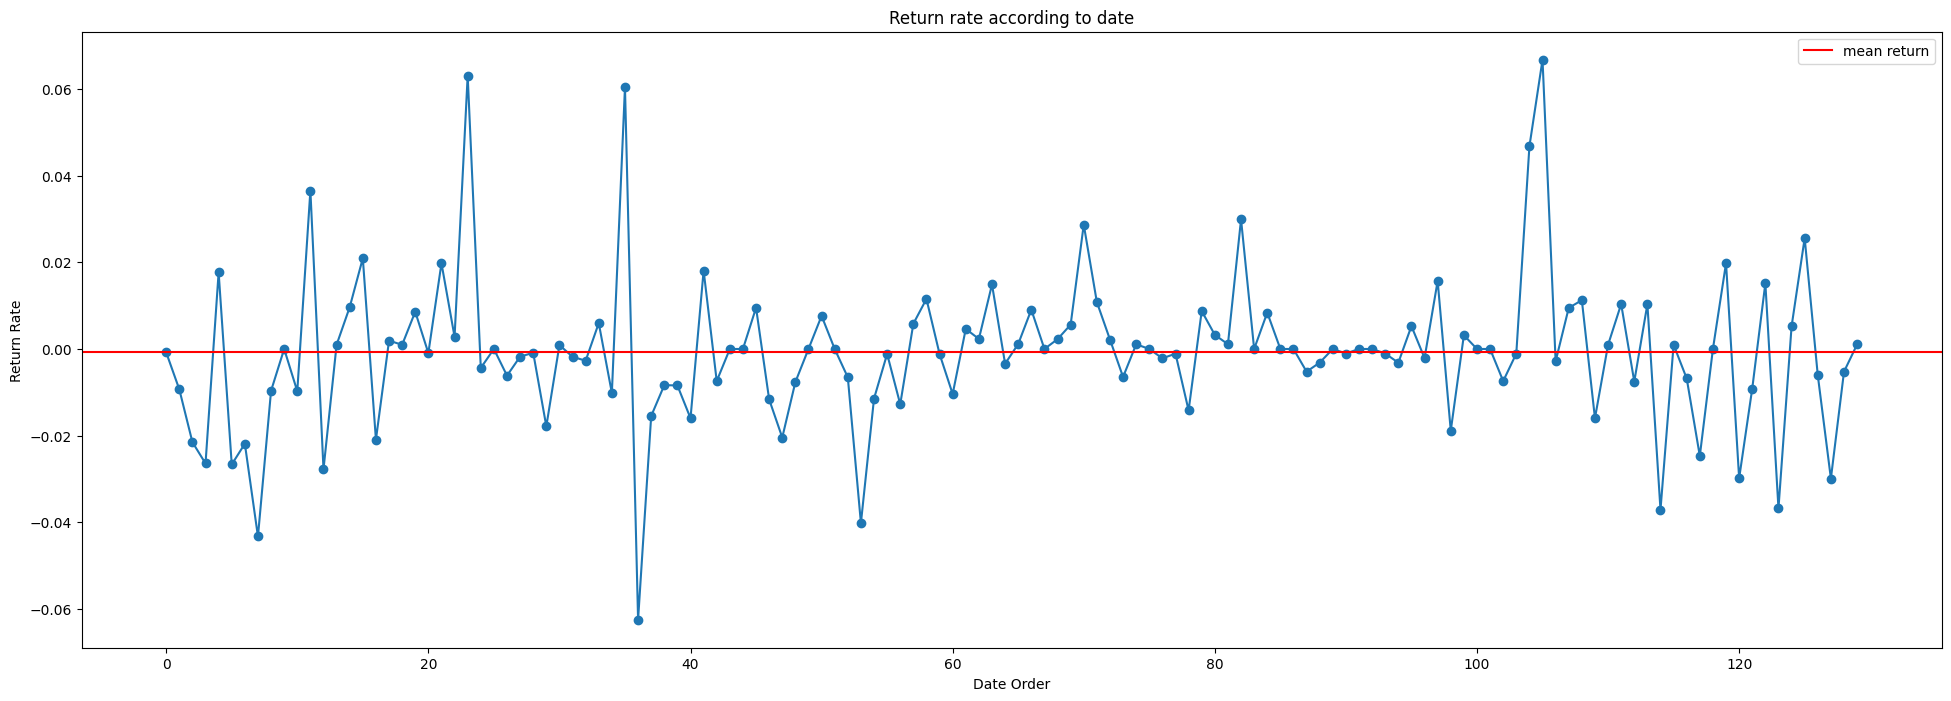

In [13]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

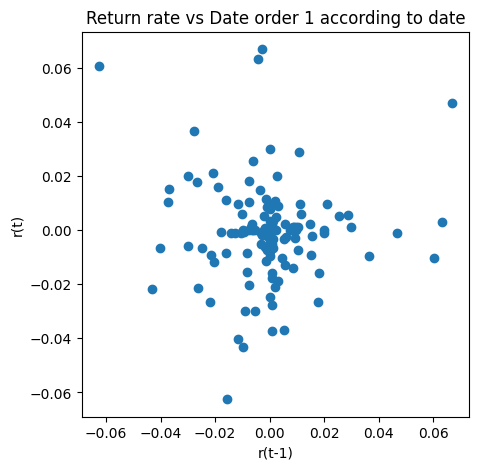

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Date order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_40976\2786627276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_t, bins = 20)


Text(0, 0.5, 'Frequency')

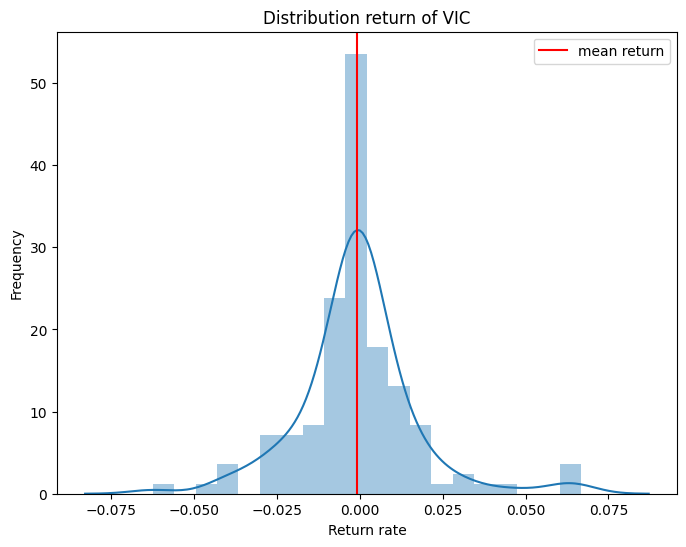

In [15]:
plt.figure(figsize = (8, 6))
sns.distplot(r_t, bins = 20)
plt.axvline(x=mean, label='mean return', c='red')
plt.title('Distribution return of VIC')
plt.legend()
plt.xlabel('Return rate')
plt.ylabel('Frequency')

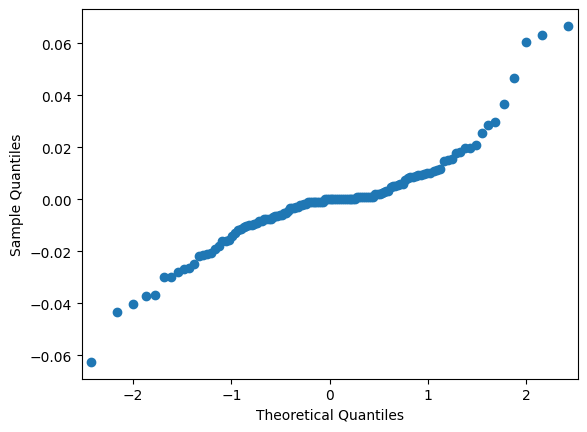

In [16]:
sm.qqplot(r_t)
plt.show()